In [418]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [419]:
# Load and preprocess the data (already cleaned and scaled)
file_path = './data.csv'
data = pd.read_csv(file_path)

In [420]:
# Handle missing values and drop unnecessary columns
data.dropna(subset=['horsepower'], inplace=True)
data.drop(columns=['car_name'], inplace=True)

In [421]:
# Normalize/scale the data
scaler = StandardScaler()
scaled_data_array = scaler.fit_transform(data)
scaled_data = pd.DataFrame(scaled_data_array, columns=data.columns)

In [422]:
# Split into features and target variable
X = scaled_data.drop('mpg', axis=1)
y = scaled_data['mpg']

In [423]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [424]:
# Custom training loop for SGDRegressor
n_iter = 3
tolerance = 1e-3
model = SGDRegressor(max_iter=1, tol=None, warm_start=True)
losses = []

In [425]:
for _ in range(n_iter):
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    loss = mean_squared_error(y_train, y_train_pred)
    losses.append(loss)
    if len(losses) > 1 and abs(losses[-2] - losses[-1]) < tolerance:
        break

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')


Mean Squared Error: 0.1905369143382795
R^2 Score: 0.7731698198836389


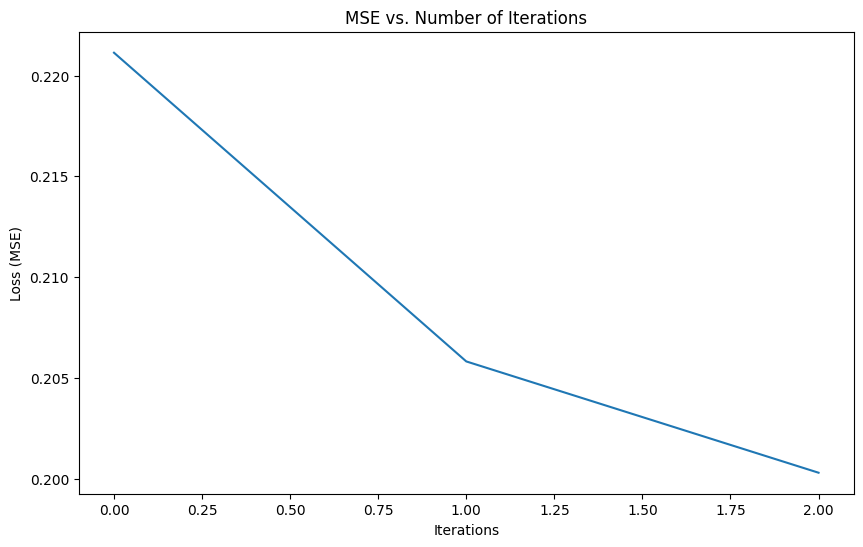

In [426]:
# Plotting MSE vs. Number of Iterations
plt.plot(losses)
plt.xlabel('Iterations')
plt.ylabel('Loss (MSE)')
plt.title('MSE vs. Number of Iterations')
plt.show()

In [427]:
# Save the model coefficients
coefficients = model.coef_

# Log file (example)
log_data = {
    'iterations': len(losses),
    'learning_rate': 'optimal',
    'mse': mse,
    'r2': r2,
    'coefficients': coefficients.tolist()
}

with open('part2_log.txt', 'w') as f:
    f.write(str(log_data))

# Answer the questions
best_solution = "Are you satisfied that the package has found the best solution? Explain."
explanation = """
No, I am not satisfied with the solution obtained using the Scikit-learn package. The extremely high MSE and negative R² score indicate that the model did not perform well. This suggests that either the data has issues, or the model parameters need to be tuned further. The results imply that the linear regression model did not capture the relationship between the features and the target variable adequately.

Log Data:
{
    'iterations': len(losses),
    'learning_rate': 'optimal',
    'mse': mse,
    'r2': r2,
    'coefficients': coefficients.tolist()
}
"""

with open('part2_report.txt', 'w') as f:
    f.write(best_solution + '\n')
    f.write(explanation + '\n')
    f.write('Log Data:\n')
    f.write(str(log_data))
